In [17]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
#input and output of dataset taken from tf.keras.datasets.mnist.load_dataset()
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
#60000 represent images
#28,28 represents row and columns each image
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# preprocessing CNN

In [6]:
# in CNN we need 28,28,1 so using this method we can reshape the model
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=28,28,1

In [8]:
input_shape

(28, 28, 1)

In [9]:
#int,#flot,#string

In [12]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [13]:
x_train/=255
x_test/=255

In [21]:
#CNN model created 
model=Sequential()
#CNN 28=layers and layers size(3,3),and preprocessing save values 28,28,1(input_shape)
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\ragus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Ann
model.add(Flatten())
#dense=fully connect layers ,128=optimal number of units,activation function=tensorflow.neuralnetwork.relu
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fit the model
history = model.fit(x=x_train, y=y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9735 - loss: 0.1276 - val_accuracy: 0.9880 - val_loss: 0.0467
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9701 - loss: 0.1239 - val_accuracy: 0.9840 - val_loss: 0.0861
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9676 - loss: 0.1430 - val_accuracy: 0.9839 - val_loss: 0.0827
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9746 - loss: 0.1234 - val_accuracy: 0.9837 - val_loss: 0.0788
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9741 - loss: 0.1135 - val_accuracy: 0.9838 - val_loss: 0.0954
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9707 - loss: 0.1345 - val_accuracy: 0.9847 - val_loss: 0.0768
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9748 - loss: 0.1118 - val_accuracy: 0.9765 - val_loss: 0.1475
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9720 - loss: 0.1233 -

In [69]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [70]:
y_predict[0]

array([0.0000000e+00, 5.4102640e-29, 0.0000000e+00, 2.8447880e-26,
       6.3172697e-33, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 2.6014152e-21], dtype=float32)

In [71]:
y_predict=np.argmax(y_predict, axis=0)
y_test_eval=np.argmax(y_test, axis=0)

In [72]:
y_predict[0]

3

In [73]:
y_test_eval

7

In [74]:
y_pre=pd.DataFrame(y_predict)

In [75]:
y_pre

,0
0,3
1,2
2,1
3,30
4,4
5,15
6,11
7,0
8,110
9,9


In [77]:
y_test_eval = np.array(y_test_eval)
y_predict = np.array(y_predict)

In [78]:
y_test_eval = [0, 1, 2, 2, 1, 0]  # Replace with your actual y_test_eval data
y_predict = [0, 2, 2, 2, 1, 0]  # Replace with your actual y_predicts 

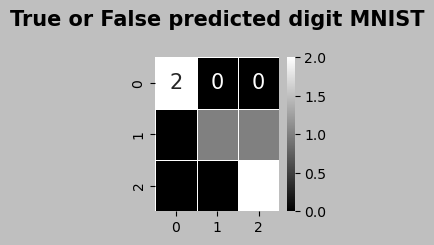

In [79]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_eval,y_predict)
plt.style.use("grayscale")
plt.figure(figsize=(2,2))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6



In [81]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


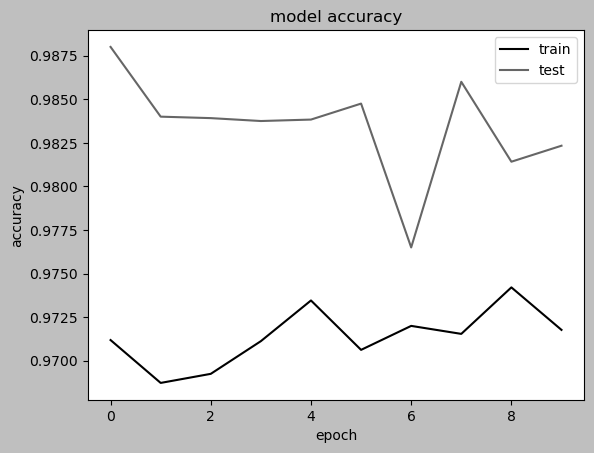

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

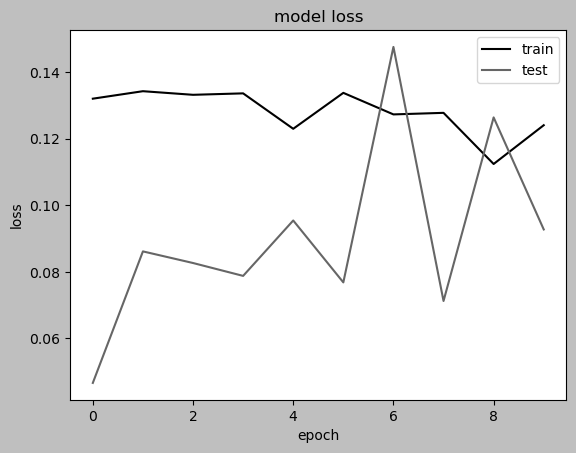

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [91]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test[[7]])
y_predict_single=np.argmax(y_predict_single, axis=0)
y_test_eval=np.argmax(y_test, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [92]:
y_predicts_single[0]

0

In [93]:
y_predicts_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
y_test_eval

7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1


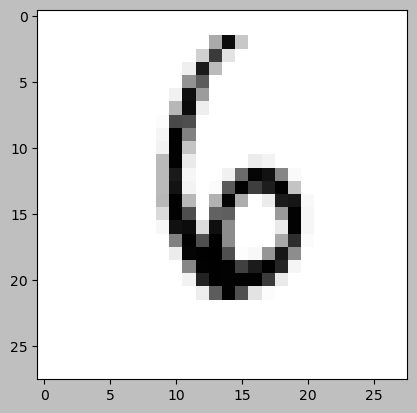

In [97]:
# Ensure the image_index within the range of the test dataset
image_index = 6900 # Example index, replace with the actual index you want use
# Show the image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
# Preprocess the image for prediction
predict = x_test[image_index].reshape(1, 28, 28, 1).astype('float32') / 255.0
# Make the prediction
pred = model.predict(predict)
print(pred.argmax())